In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load Google stock price dataset
data = pd.read_csv('Google_Stock_Price_Train.csv')

In [5]:
# Assume 'Close' is the target column for prediction
data = data[["Close"]]
data.dropna(inplace=True)

In [6]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [7]:
# Create sequences for time series prediction
def create_sequences(data, sequence_length):
    X, Y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

In [8]:
sequence_length = 60
X, Y = create_sequences(data_scaled, sequence_length)

In [9]:
# Reshape input to be 3D for RNN [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [10]:
# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

In [11]:
# Build RNN model
model = keras.Sequential([
    layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.SimpleRNN(50),
    layers.Dense(1)
])

In [12]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50

30/30 [==============================] - 6s 64ms/step - loss: 0.0199 - val_loss: 0.0033
Epoch 2/50
30/30 [==============================] - 1s 30ms/step - loss: 5.7652e-04 - val_loss: 0.0018
Epoch 3/50
30/30 [==============================] - 1s 32ms/step - loss: 5.2113e-04 - val_loss: 8.0269e-04
Epoch 4/50
30/30 [==============================] - 1s 32ms/step - loss: 4.2191e-04 - val_loss: 0.0022
Epoch 5/50
30/30 [==============================] - 1s 31ms/step - loss: 5.3603e-04 - val_loss: 5.4843e-04
Epoch 6/50
30/30 [==============================] - 1s 30ms/step - loss: 4.2257e-04 - val_loss: 0.0017
Epoch 7/50
30/30 [==============================] - 1s 34ms/step - loss: 4.0389e-04 - val_loss: 0.0023
Epoch 8/50
30/30 [==============================] - 1s 30ms/step - loss: 9.6783e-04 - val_loss: 7.5901e-04
Epoch 9/50
30/30 [==============================] - 1s 32ms/step - loss: 4.5564e-04 - val_loss: 3.2442e-04
Epoch 10/50
30/30 [==============================] - 1s 30ms

In [14]:
# Evaluate model
loss = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}")

9/9 [==============================] - 0s 8ms/step - loss: 6.8643e-04
Test Loss: 0.0007


In [15]:
# Predict
predicted_stock_price = model.predict(X_test)

9/9 [==============================] - 0s 7ms/step


In [16]:
# Inverse transform predictions
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))

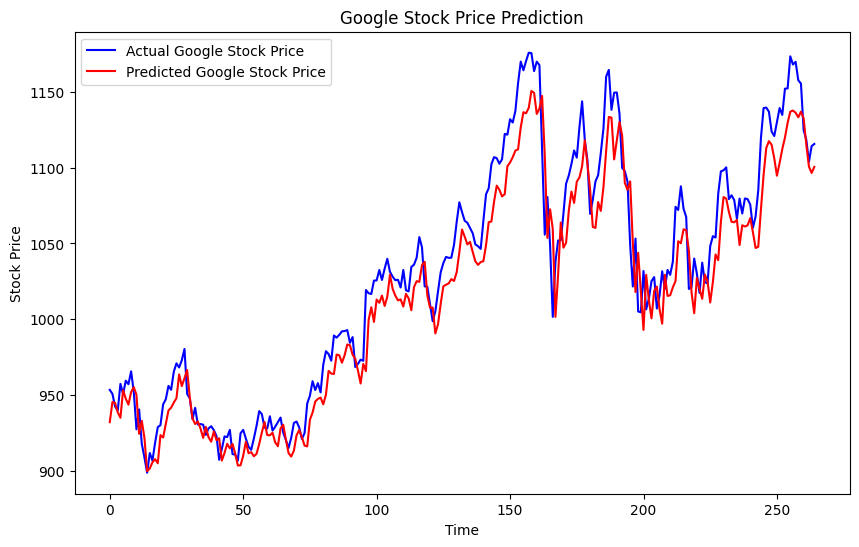

In [17]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()